# imports

In [1]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 34.7 MB/s 
     |████████████████████████████████| 11.2 MB 55.7 MB/s 
     |████████████████████████████████| 96 kB 5.3 MB/s 
     |████████████████████████████████| 88 kB 7.7 MB/s 
     |████████████████████████████████| 960 kB 56.7 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3bdad8ba775c9cda4fe01014c841667fb1b677a2b85b699ad720ec06241c1b09
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=a74836927de5ab3dcb4cbc46146e905d90ff0e3657314b2646db9953f2ec0a2f
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

# integration of train and test data, for similar dimension reduction in both

In [2]:
!pip install --quiet scvi-colab
!pip install --quiet git+https://github.com/theislab/scib.git
from scvi_colab import install
install()

     |████████████████████████████████| 237 kB 7.1 MB/s 
     |████████████████████████████████| 51 kB 7.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.2 MB 15.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.9 MB/s 
     |████████████████████████████████| 1.3 MB 38.0 MB/s 
     |████████████████████████████████| 8.8 MB 37.9 MB/s 
INFO     scvi-colab: Installing scvi-tools.                                                                        
INFO     scvi-colab: Install successful. Testing import.                                                           


INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:54: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  "pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6"
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import scanpy as sc
import scvi
import scib

sc.set_figure_params(figsize=(4, 4))

%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
%config InlineBackend.figure_format='retina'

In [4]:
scvi.__version__, scib.__version__

('0.17.4', '1.0.4')

In [6]:
!pip install matplotlib==3.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.8.2 requires matplotlib>=3.1.2, but you have matplotlib 3.1.1 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:83: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [16]:
adata_train = sc.read_visium('/content/drive/MyDrive/CS690-Assignment1-Task1')
adata_train.var_names_make_unique()  

reading /content/drive/MyDrive/CS690-Assignment1-Task1/filtered_feature_bc_matrix.h5
 (0:00:01)


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [17]:
adata_test = sc.read_visium('/content/drive/MyDrive/CS690-Assignment1-Task2')
adata_test.var_names_make_unique()

reading /content/drive/MyDrive/CS690-Assignment1-Task2/filtered_feature_bc_matrix.h5
 (0:00:03)


In [19]:
adata2 = adata_train.concatenate(adata_test)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [20]:
adata2

AnnData object with n_obs × n_vars = 7312 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [21]:
# from skmisc.loess import loess
adata2.layers["counts"] = adata2.X.copy()
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)
adata2.raw = adata2  # keep full dimension safe
sc.pp.highly_variable_genes(
    adata2,
    flavor="seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True
)
scvi.model.SCVI.setup_anndata(adata2, layer="counts", batch_key="batch")
vae = scvi.model.SCVI(adata2, n_layers=2, n_latent=30)
vae.train()

normalizing counts per cell
    finished (0:00:00)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|██████████| 400/400 [30:49<00:00,  4.36s/it, loss=741, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [30:49<00:00,  4.62s/it, loss=741, v_num=1]


In [22]:
adata2.obsm["X_scVI"] = vae.get_latent_representation()

In [23]:
sc.pp.neighbors(adata2, use_rep="X_scVI")
sc.tl.leiden(adata2)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [ ]:
from scvi.model.utils import mde
import pymde
adata2.obsm["X_mde"] = mde(adata2.obsm["X_scVI"])

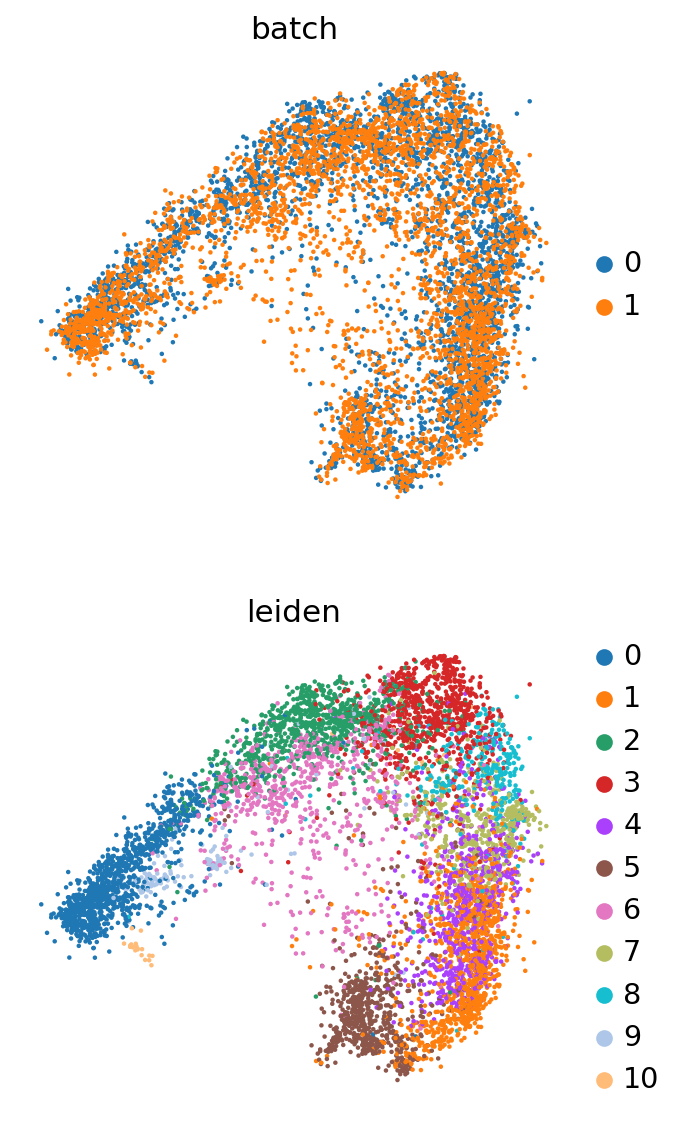

In [25]:
sc.pl.embedding(
    adata2,
    basis="X_mde",
    color=["batch", "leiden"],
    frameon=False,
    ncols=1,
)

# model

In [41]:
adata = adata2

In [42]:
# getting the latent representations and storing in adata.obs
Z_hat = vae.get_latent_representation()
for i, z in enumerate(Z_hat.T):
    adata.obs[f'Z_{i}'] = z

In [43]:
adata_test_obs = adata.obs[3639:]
adata_obs = adata.obs[:3639]

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Y = pd.read_csv('/content/drive/MyDrive/CS690-Assignment1-Task1/Train_metadata.csv')

# separating out the input (X) and output (y) from the adata
# X = adata.obs[{'Z_0','Z_1','Z_2','Z_3','Z_4'}] 
X = adata_obs[{'Z_0','Z_1','Z_2','Z_3','Z_4','Z_5','Z_6','Z_7','Z_8','Z_9', 'Z_10','Z_11','Z_12','Z_13','Z_14','Z_15','Z_16','Z_17','Z_18','Z_19', 'Z_20','Z_21','Z_22','Z_23','Z_24','Z_25','Z_26','Z_27','Z_28','Z_29'}] 
# X = adata2.obsm[]
# X = adata.obs[{'Z_0','Z_1','Z_2','Z_3','Z_4','Z_5','Z_6','Z_7','Z_8','Z_9','Z_10','Z_11','Z_12','Z_13','Z_14','Z_15','Z_16','Z_17','Z_18','Z_19' }] 


x_temp1 = adata_obs['array_row']
x_temp1 = np.array(x_temp1)
x_temp1 = x_temp1/max(x_temp1)

x_temp2 = adata_obs['array_col']
x_temp2 = np.array(x_temp2)
x_temp2 = x_temp2/max(x_temp2)

X['row'] = x_temp1
X['col'] = x_temp2
y = Y['Cluster']
y = np.array(y)

y = y.astype(str)
unique_cluster_types = np.unique(y) #unique cell types

cell_type_number = {} #dictionary of cell types against their index
for i in range(len(unique_cluster_types)):
  cell_type_number[unique_cluster_types[i]] = i

y_numbered = [0]*len(y) #numerical output
for i in range(len(y)):
  y_numbered[i] = cell_type_number[y[i]]
y_numbered = np.array(y_numbered)
X_copy = X.copy()
y_num_copy = y_numbered.copy()
# oversampling
X['output'] = y_numbered

X_0 = X.loc[X['output'] == 0]
X_1 = X.loc[X['output'] == 1]
X_2 = X.loc[X['output'] == 2]
X_3 = X.loc[X['output'] == 3]
X_4 = X.loc[X['output'] == 4]
X_5 = X.loc[X['output'] == 5]
X_6 = X.loc[X['output'] == 6]
X_7 = X.loc[X['output'] == 7]

max_len = max(len(X_0), len(X_1), len(X_2), len(X_3), len(X_4), len(X_5), len(X_6), len(X_7))
X_0 = X_0.sample(5*max_len, replace = True)
X_1 = X_1.sample(5*max_len, replace = True)
X_2 = X_2.sample(5*max_len, replace = True)
X_3 = X_3.sample(5*max_len, replace = True)
X_4 = X_4.sample(5*max_len, replace = True)
X_5 = X_5.sample(5*max_len, replace = True)
X_6 = X_6.sample(5*max_len, replace = True)
X_7 = X_7.sample(5*max_len, replace = True)

X = pd.concat([X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7], axis = 0)

y_numbered = X['output']
# y_numbered = np.array(y_numbered)
X = X.drop('output', axis = 'columns')
# X = np.array(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [45]:
# train test split
from sklearn.model_selection import train_test_split
y_train, y_test, X_train, X_test = train_test_split(y_numbered, X, test_size = 0.2, random_state = 2, stratify = y_numbered)

In [64]:
# actual model
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(32,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# model fitting
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
989/989 [==============================] - 3s 2ms/step - loss: 0.7131 - sparse_categorical_accuracy: 0.7249
Epoch 2/10
989/989 [==============================] - 2s 2ms/step - loss: 0.3647 - sparse_categorical_accuracy: 0.8593
Epoch 3/10
989/989 [==============================] - 2s 2ms/step - loss: 0.2963 - sparse_categorical_accuracy: 0.8838
Epoch 4/10
989/989 [==============================] - 2s 2ms/step - loss: 0.2513 - sparse_categorical_accuracy: 0.9012
Epoch 5/10
989/989 [==============================] - 2s 2ms/step - loss: 0.2148 - sparse_categorical_accuracy: 0.9170
Epoch 6/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1842 - sparse_categorical_accuracy: 0.9308
Epoch 7/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1615 - sparse_categorical_accuracy: 0.9399
Epoch 8/10
989/989 [==============================] - 2s 2ms/step - loss: 0.1410 - sparse_categorical_accuracy: 0.9498
Epoch 9/10
989/989 [============================

In [65]:
model.evaluate(X_test,y_test)

248/248 [==============================] - 1s 2ms/step - loss: 0.1404 - sparse_categorical_accuracy: 0.9520


[0.14037571847438812, 0.951971709728241]

In [66]:
X_np = np.array(X_copy)
# prediction array

prediction = []
for i in range(len(X_np)):
  prediction.append(np.argmax(model.predict(X_np[[i]])))

In [67]:
adata = adata2

In [68]:
prediction_str = []
for i in range(len(prediction)):
  prediction_str.append(str(prediction[i])) 
adata_train.obs['clusters_pred'] = prediction_str

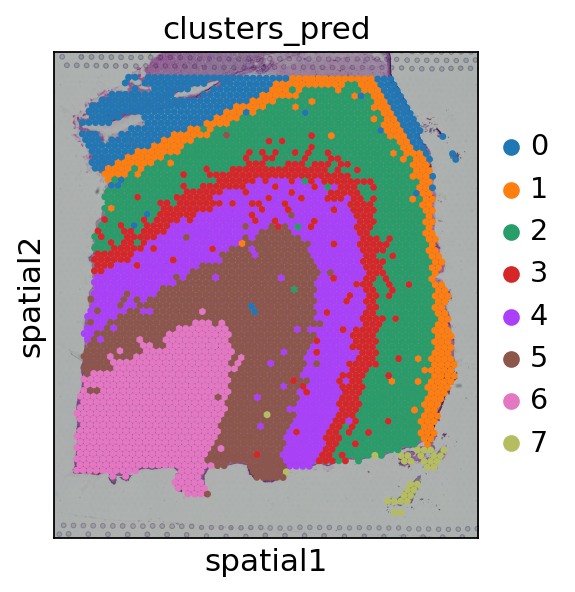

In [69]:
sc.pl.spatial(adata_train, img_key = "hires", color="clusters_pred", size=1.5)

In [70]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_num_copy, prediction)
ari

0.8274292739117094

# applying model on test data and smoothing



In [71]:
Xt = adata_test_obs[{'Z_0','Z_1','Z_2','Z_3','Z_4','Z_5','Z_6','Z_7','Z_8','Z_9','Z_10','Z_11','Z_12','Z_13','Z_14','Z_15','Z_16','Z_17','Z_18','Z_19', 'Z_20','Z_21','Z_22','Z_23','Z_24','Z_25','Z_26','Z_27','Z_28','Z_29'}] 


In [72]:
xt_temp1 = adata_test_obs['array_row']
xt_temp1 = np.array(xt_temp1)
xt_temp1 = xt_temp1/max(xt_temp1)

xt_temp2 = adata_test_obs['array_col']
xt_temp2 = np.array(xt_temp2)
xt_temp2 = xt_temp2/max(xt_temp2)

Xt['row'] = xt_temp1
Xt['col'] = xt_temp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [73]:
Xt_np = np.array(Xt)
# prediction array
predictiont_array = []
for i in range(len(Xt_np)):
  predictiont_array.append(model.predict(Xt_np[[i]]))
predictiont = []
for i in range(len(Xt_np)):
  predictiont.append(np.argmax(predictiont_array[i]))

In [74]:
predictiont_str = []
for i in range(len(predictiont)):
  predictiont_str.append(str(predictiont[i])) 
adata_test.obs['clusters_pred'] = predictiont_str

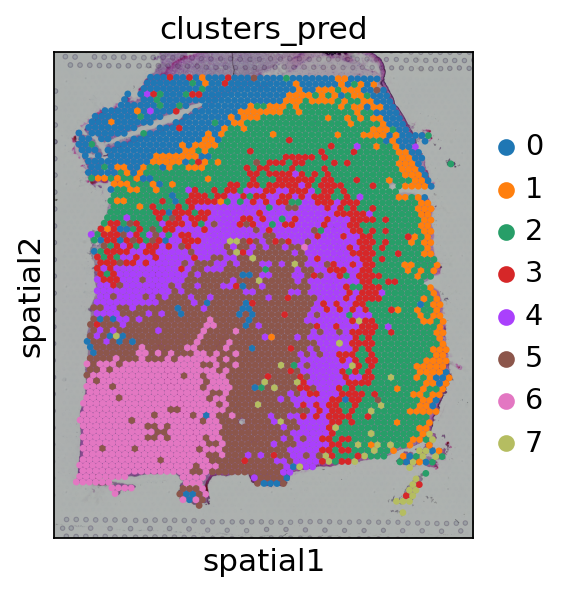

In [75]:
sc.pl.spatial(adata_test, img_key = "hires", color="clusters_pred", size=1.5)


smoothening

In [76]:
num1 = max(adata_test.obs['array_col'])+1
num2 = max(adata_test.obs['array_row'])+1
coor_to_ind = [[-1]*(num1) for i in range(num2)]
for i in range(len(adata_test.obs)):
  coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]] = i

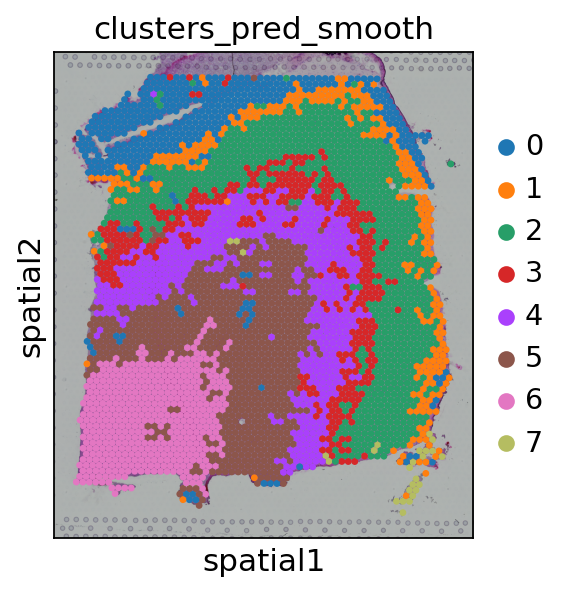

In [77]:
clusters_copy = adata_test.obs['clusters_pred'].copy()
for i in range(len(adata_test.obs)):
  # print(i, adata.obs['array_col'][i], adata.obs['array_row'][i])
  if adata_test.obs['array_col'][i] == 0 or adata_test.obs['array_col'][i] == 1 or adata_test.obs['array_col'][i] == num1-1 or adata_test.obs['array_col'][i] == num1-2 or adata_test.obs['array_row'][i] == 0 or adata_test.obs['array_row'][i] == 1 or adata_test.obs['array_row'][i] == num2-1 or adata_test.obs['array_row'][i] == num2-2:
    continue
  ct = adata_test.obs['clusters_pred'][i]
  lt = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]-2]]
  tl = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]-1]]
  tr = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]+1]]
  rt = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]+2]]
  br = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]+1]]
  bl = adata_test.obs['clusters_pred'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]-1]]
  if ct != lt and ct != tl and ct != tr and ct != rt and ct != br and ct != bl:
     clusters_copy[i] = lt
adata_test.obs['clusters_pred_smooth'] = clusters_copy
sc.pl.spatial(adata_test, img_key = "hires", color="clusters_pred_smooth", size=1.5)

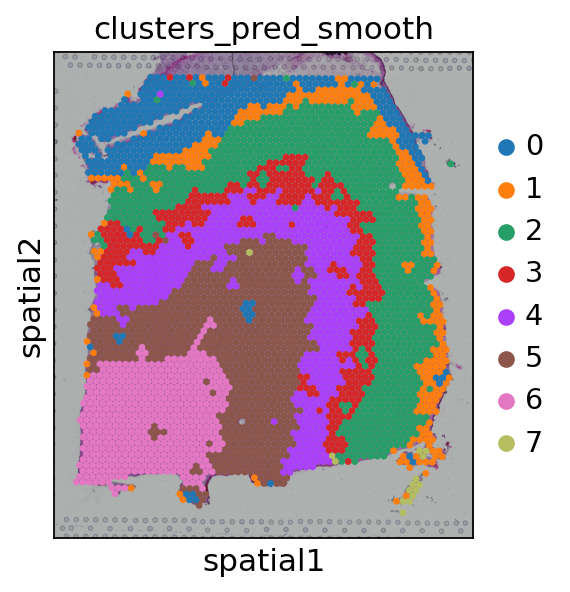

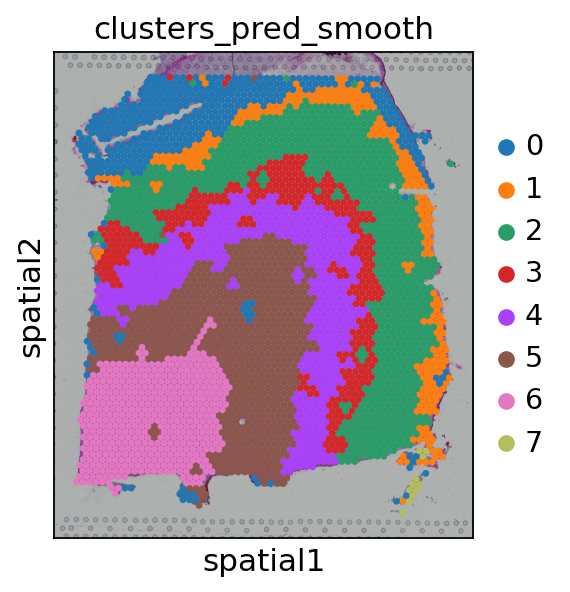

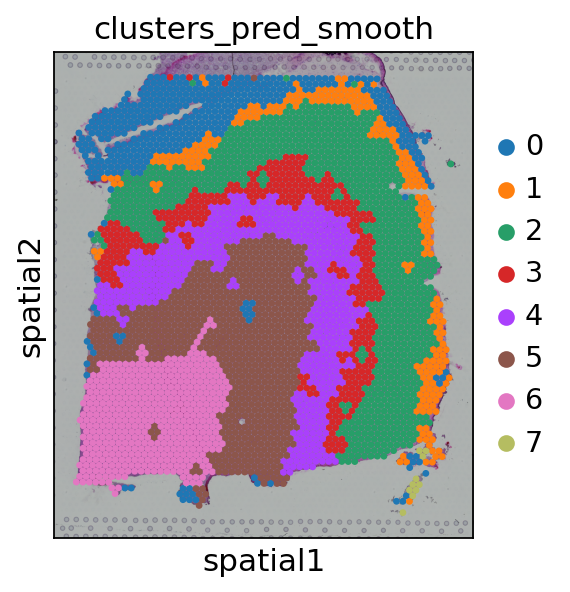

In [78]:
for j in range(3):
  clusters_copy = adata_test.obs['clusters_pred_smooth'].copy()
  for i in range(len(adata_test.obs)):
    # print(i, adata.obs['array_col'][i], adata.obs['array_row'][i])
    if adata_test.obs['array_col'][i] == 0 or adata_test.obs['array_col'][i] == 1 or adata_test.obs['array_col'][i] == num1-1 or adata_test.obs['array_col'][i] == num1-2 or adata_test.obs['array_row'][i] == 0 or adata_test.obs['array_row'][i] == 1 or adata_test.obs['array_row'][i] == num2-1 or adata_test.obs['array_row'][i] == num2-2:
      continue
    ct = adata_test.obs['clusters_pred_smooth'][i]
    lt = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]-2]]
    tl = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]-1]]
    tr = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]+1]]
    rt = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]+2]]
    br = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]+1]]
    bl = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]-1]]
    if ct != lt and ct != tl and ct != tr and ct != rt and ct != br:
      clusters_copy[i] = lt
    if ct != lt and ct != tl and ct != tr and ct != rt and ct != bl:
      clusters_copy[i] = lt
    if ct != lt and ct != tl and ct != tr and ct != br and ct != bl:
      clusters_copy[i] = lt
    if ct != lt and ct != tl and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = lt
    if ct != lt and ct != tr and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = lt
    if ct != tl and ct != tr and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = tl
  adata_test.obs['clusters_pred_smooth'] = clusters_copy
  sc.pl.spatial(adata_test, img_key = "hires", color="clusters_pred_smooth", size=1.5)

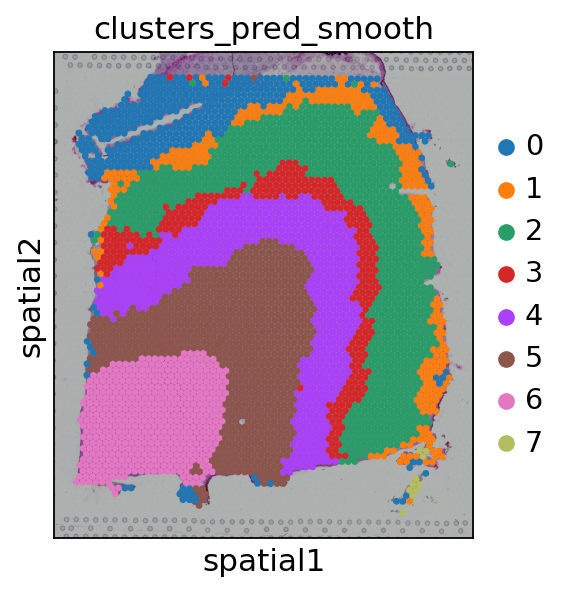

In [79]:
clusters_copy = adata_test.obs['clusters_pred_smooth'].copy()
for i in range(len(adata_test.obs)):
  # print(i, adata.obs['array_col'][i], adata.obs['array_row'][i])
  col = adata_test.obs['array_col'][i]
  row = adata_test.obs['array_row'][i]
  if col <= 10 or col >= num1-10 or row <= 10 or row >= num2-10:
    continue
  ct = predictiont_array[i]
  lt = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]-2]]
  tl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]-1]]
  tr = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]+1]]
  rt = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]+2]]
  br = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]+1]]
  bl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]-1]]
  ltlt = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]-4]]
  lttl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]-3]]
  ltbl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]-3]]
  rtrt = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]+4]]
  rttr = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]+3]]
  rtbr = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]+3]]
  ttl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-2][adata_test.obs['array_col'][i]-2]]
  top = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-2][adata_test.obs['array_col'][i]]]
  ttr = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]-2][adata_test.obs['array_col'][i]+1]]
  bbl = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+2][adata_test.obs['array_col'][i]-2]]
  bot = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+2][adata_test.obs['array_col'][i]]]
  bbr = predictiont_array[coor_to_ind[adata_test.obs['array_row'][i]+2][adata_test.obs['array_col'][i]+1]]
  
  arr = np.array(ct+lt+tl+tr+rt+br+bl+ltlt+lttl+ltbl+rtrt+rttr+rtbr+ttl+top+ttr+bbl+bot+bbr)
  # if np.argmax(arr) == 1 or np.argmax(arr) == 3 or np.argmax(arr) == 7 or np.argmax(arr) ==: clusters_copy[i] = str(np.argmax(arr))
  # if ct != lt and ct != tl and ct != tr and ct != rt and ct != br and ct != bl:
  clusters_copy[i] = str(np.argmax(arr))
adata_test.obs['clusters_pred_smooth'] = clusters_copy
sc.pl.spatial(adata_test, img_key = "hires", color="clusters_pred_smooth", size=1.5)

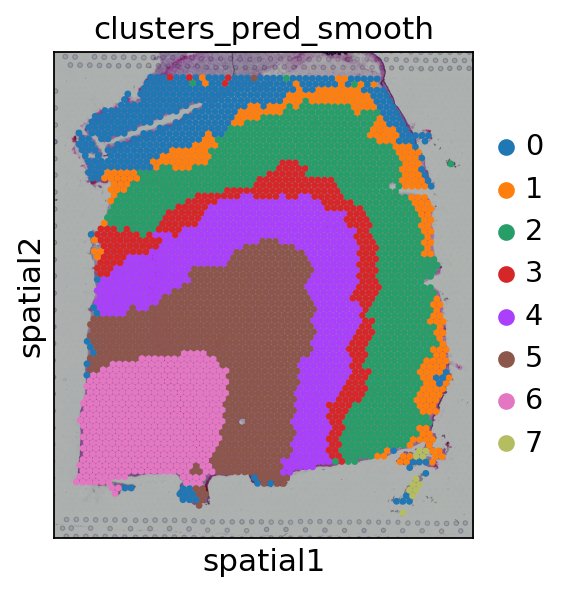

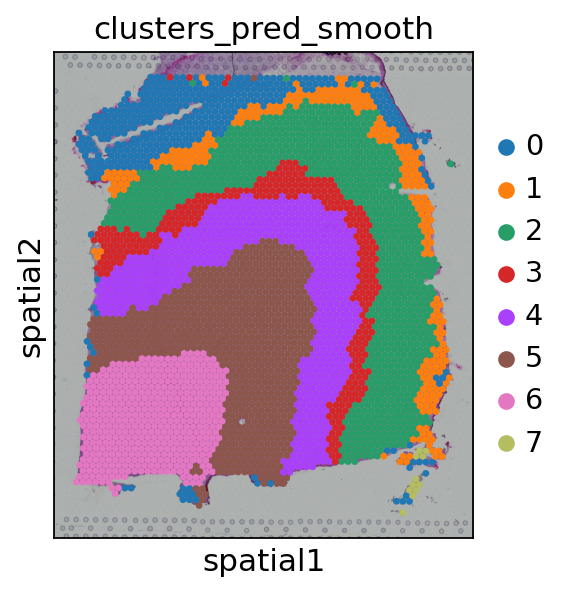

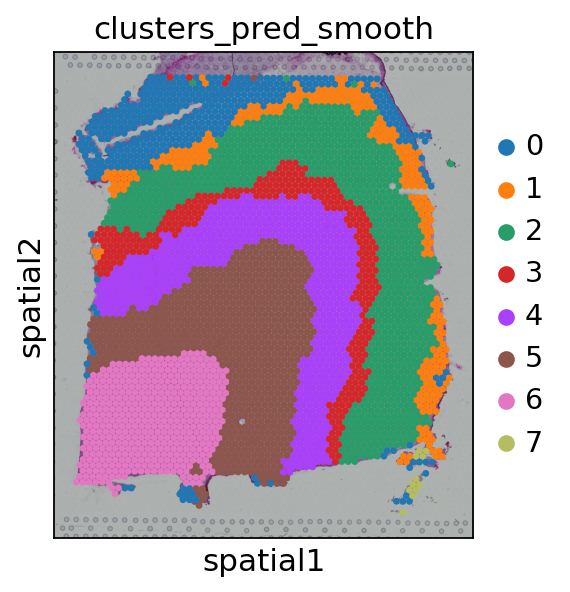

In [80]:
for j in range(3):
  clusters_copy = adata_test.obs['clusters_pred_smooth'].copy()
  for i in range(len(adata_test.obs)):
    # print(i, adata.obs['array_col'][i], adata.obs['array_row'][i])
    if adata_test.obs['array_col'][i] == 0 or adata_test.obs['array_col'][i] == 1 or adata_test.obs['array_col'][i] == num1-1 or adata_test.obs['array_col'][i] == num1-2 or adata_test.obs['array_row'][i] == 0 or adata_test.obs['array_row'][i] == 1 or adata_test.obs['array_row'][i] == num2-1 or adata_test.obs['array_row'][i] == num2-2:
      continue
    ct = adata_test.obs['clusters_pred_smooth'][i]
    lt = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]-2]]
    tl = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]-1]]
    tr = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]-1][adata_test.obs['array_col'][i]+1]]
    rt = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]][adata_test.obs['array_col'][i]+2]]
    br = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]+1]]
    bl = adata_test.obs['clusters_pred_smooth'][coor_to_ind[adata_test.obs['array_row'][i]+1][adata_test.obs['array_col'][i]-1]]
    if ct != lt and ct != tl and ct != tr and ct != rt and ct != br:
      clusters_copy[i] = rt
    if ct != lt and ct != tl and ct != tr and ct != rt and ct != bl:
      clusters_copy[i] = rt
    if ct != lt and ct != tl and ct != tr and ct != br and ct != bl:
      clusters_copy[i] = tr
    if ct != lt and ct != tl and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = rt
    if ct != lt and ct != tr and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = rt
    if ct != tl and ct != tr and ct != rt and ct != br and ct != bl:
      clusters_copy[i] = rt
  adata_test.obs['clusters_pred_smooth'] = clusters_copy
  sc.pl.spatial(adata_test, img_key = "hires", color="clusters_pred_smooth", size=1.5, save = True)

In [81]:
bars_to_avoid = pd.read_csv('/content/drive/MyDrive/CS690-Assignment1-Task2/Test_barcodes_to_avoid.csv')
adata_test_copy = adata_test.obs.copy()
for i in range(len(bars_to_avoid)):
  adata_test_copy.drop(index = bars_to_avoid['0'][i], inplace = True)
id = adata_test_copy.index
expect = np.array(adata_test_copy['clusters_pred_smooth'])
output = pd.DataFrame()
output['Id'] = id
output['Expected'] = expect
output.to_csv('output.csv')

In [ ]:
output

Id Expected
0     AAACAAGTATCTCCCA-1        2
1     AAACAATCTACTAGCA-1        2
2     AAACACCAATAACTGC-1        6
3     AAACAGAGCGACTCCT-1        2
4     AAACAGCTTTCAGAAG-1        4
...                  ...      ...
3630  TTGTTTCACATCCAGG-1        6
3631  TTGTTTCATTAGTCTA-1        6
3632  TTGTTTCCATACAACT-1        5
3633  TTGTTTGTATTACACG-1        7
3634  TTGTTTGTGTAAATTC-1        0

[3635 rows x 2 columns]